In [4]:
from roulette import Roulette
from collections import Counter
import random
from simulations_core import *
from simulations_plots_core import *

roulette = Roulette()

In [5]:
def andrucci_betting(goal_money_won, bet):
    watch_bets = random.randint(30,37)
    numbers_chosen = [roulette.spin() for _ in range(watch_bets)]
    counts = Counter(numbers_chosen)
    sorted = counts.most_common()
    play_on = random.randint(0,len(sorted)//2)
    money_history = []
    money = 0
    while money < goal_money_won:
        money += roulette.make_specific_single_bet(bet, play_on)
        money_history.append(money)
        
        if money < -34*bet:
            return money_history

    return money_history

In [6]:
money_histories = simulate_different_goal_money(
                    betting_type = andrucci_betting, 
                    goal_money_list = [10, 100, 500, 1000], 
                    number_histories = 1000,
                    start_bet= 1)


In [7]:
successful_histories = dict()
for goal in [10, 100, 500, 1000]:
    successful_histories[goal] = [money_history for money_history in money_histories[goal] if money_history[-1] >= goal]

In [8]:
def plot_successful_bets(money_histories, goal, title='Successful bets'):
    num_bets = ['Successful' if money_history[-1] >= goal else 'Unsuccessful' for money_history in money_histories]
    plt.hist(num_bets)
    plt.title(title)
    plt.show()

## Analysis when the goal is to win 10 units

In [9]:
len(successful_histories[10])

556

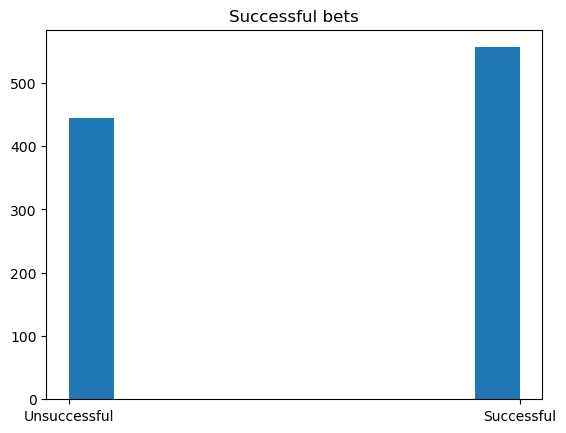

In [10]:
plot_successful_bets(money_histories[10], 10)

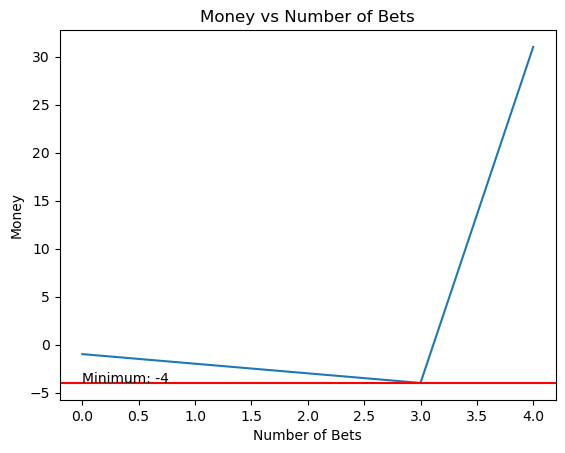

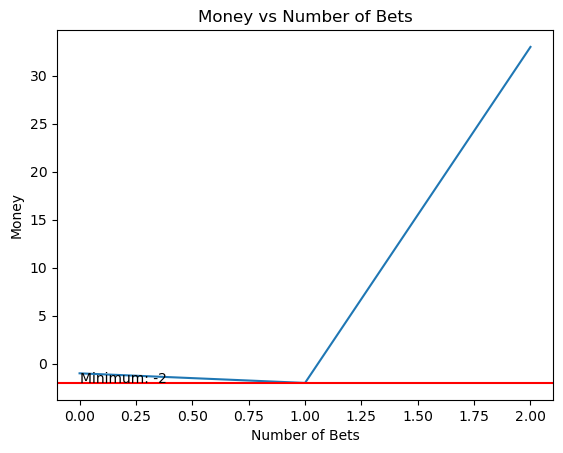

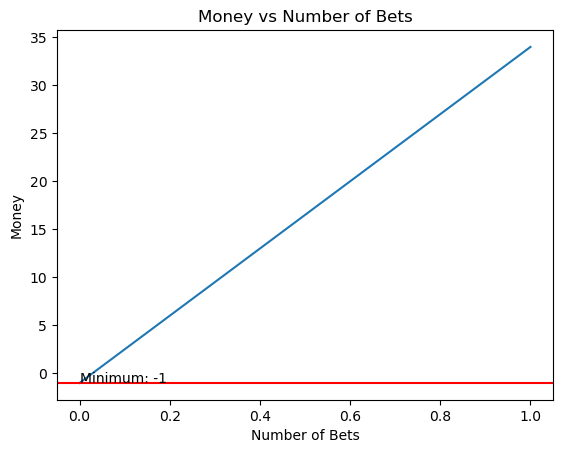

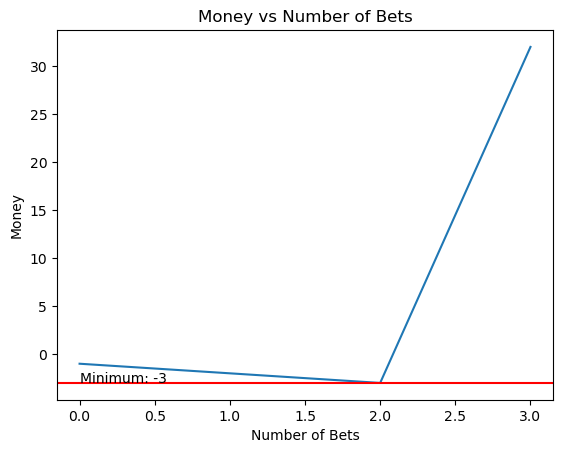

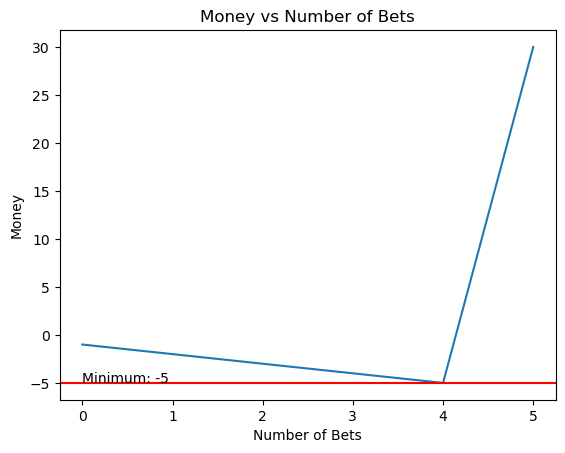

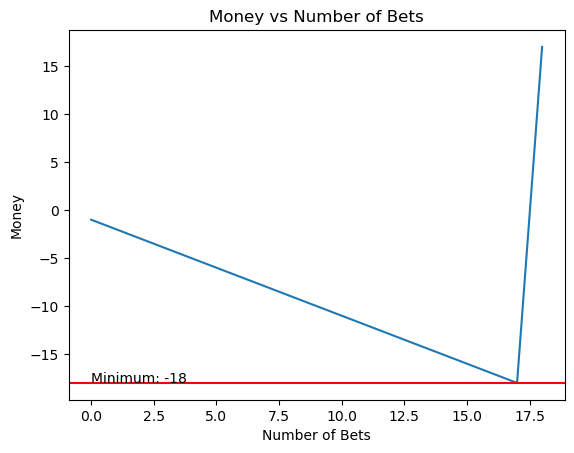

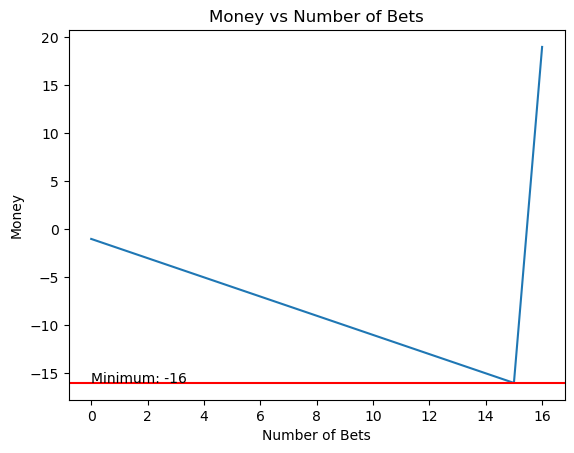

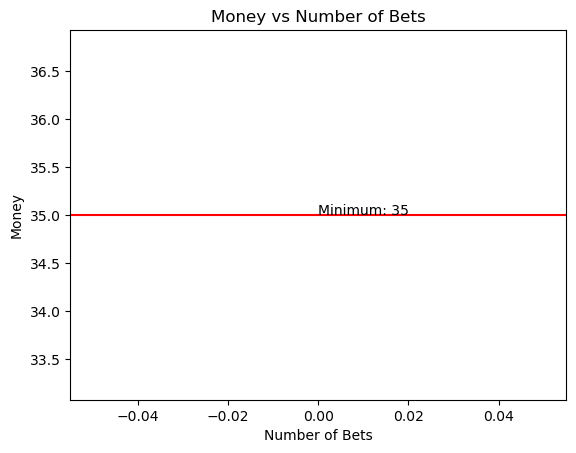

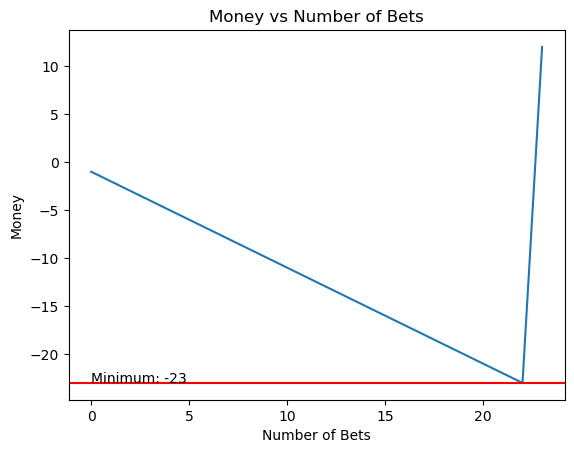

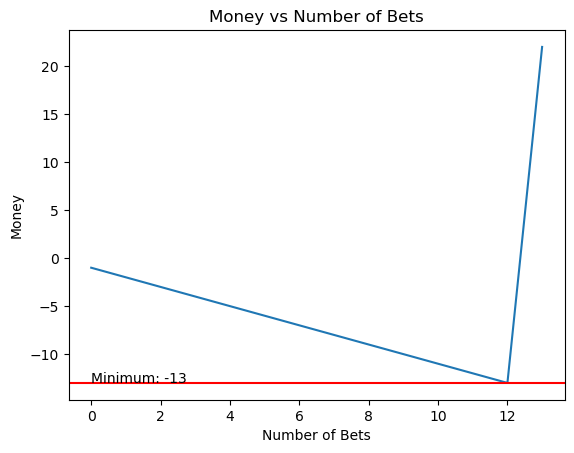

In [11]:
plot_money_histories(successful_histories, 10)

## Analysis when the goal is to win 100 units

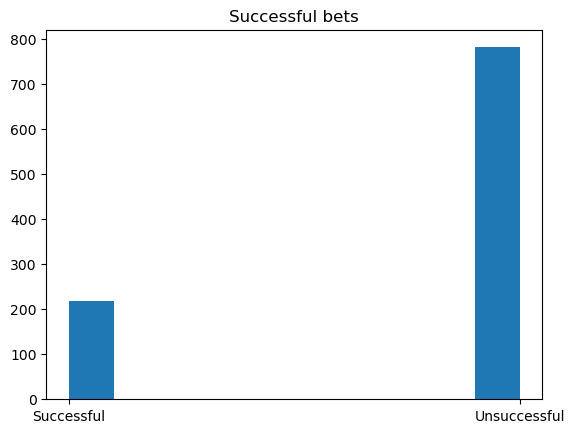

In [12]:
plot_successful_bets(money_histories[100], 100)

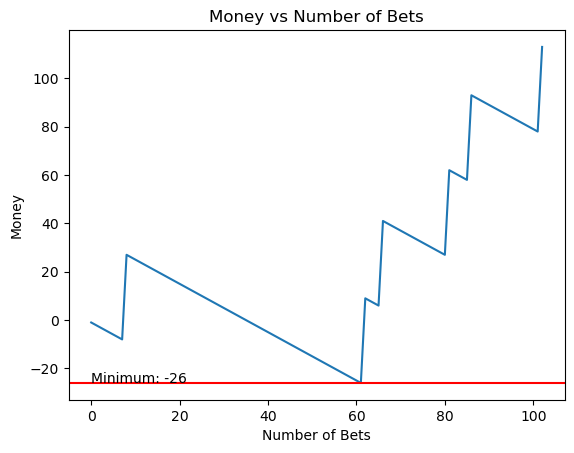

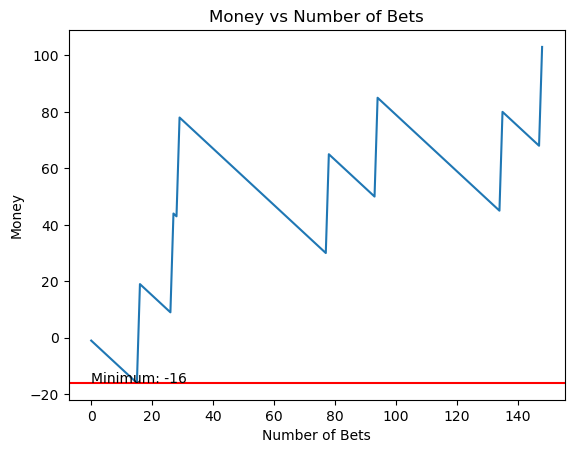

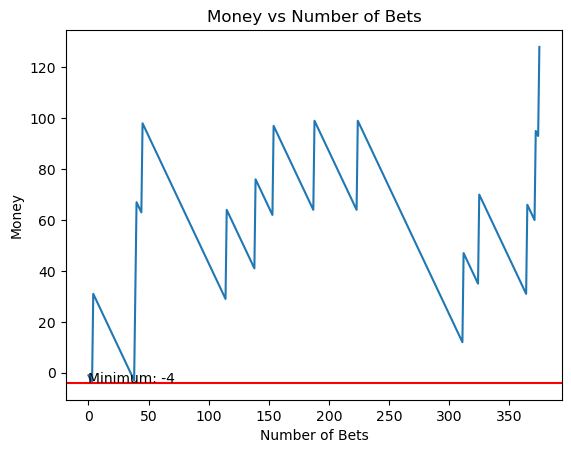

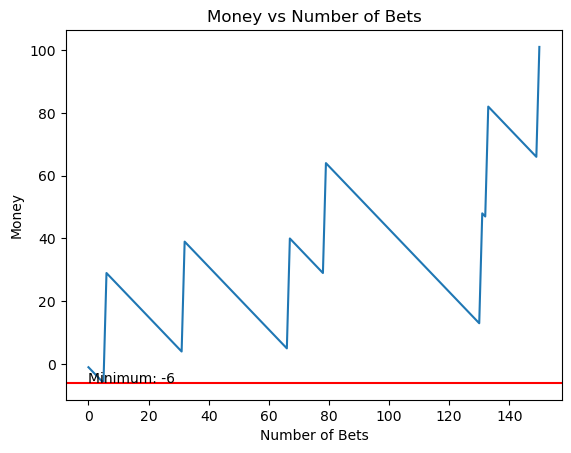

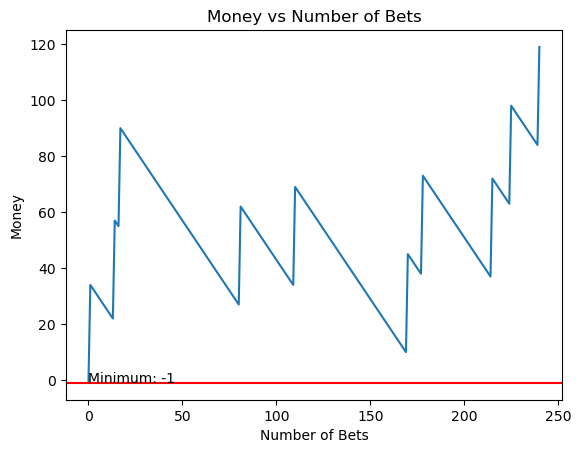

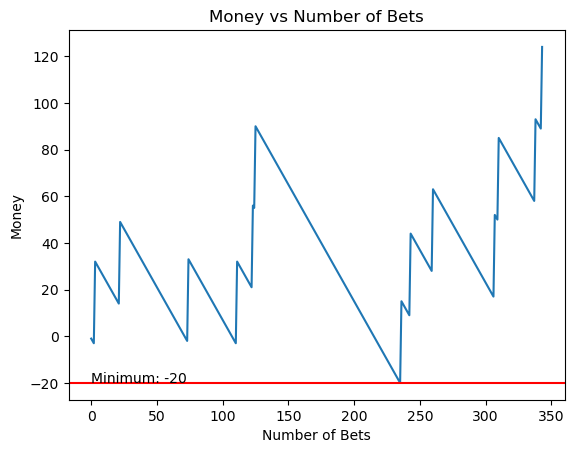

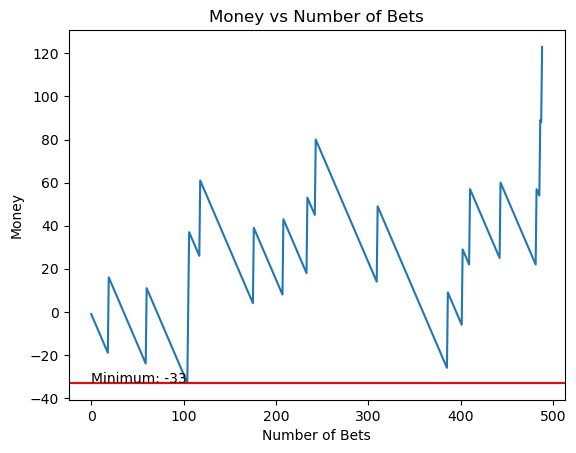

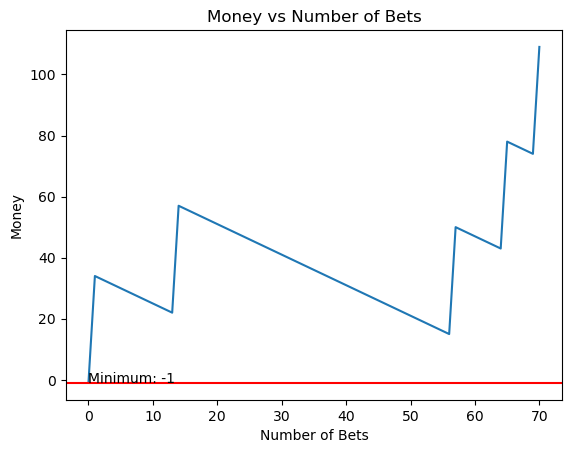

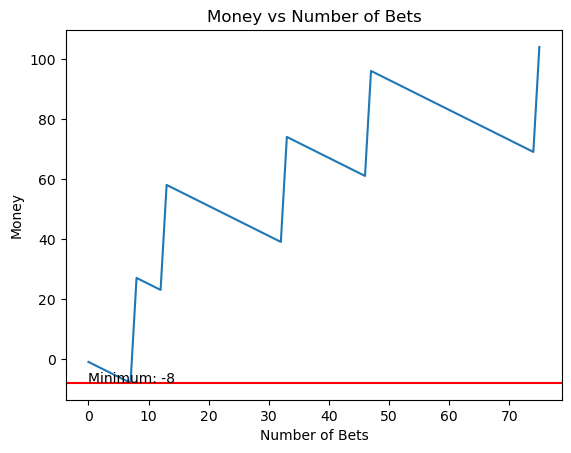

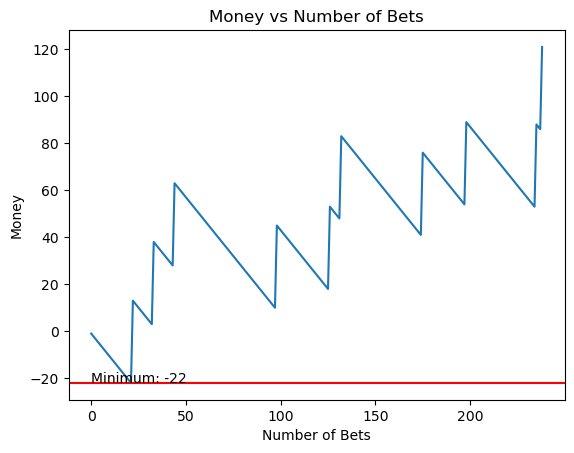

In [13]:
plot_money_histories(successful_histories, 100)

## Analysis when the goal is to win 500 units

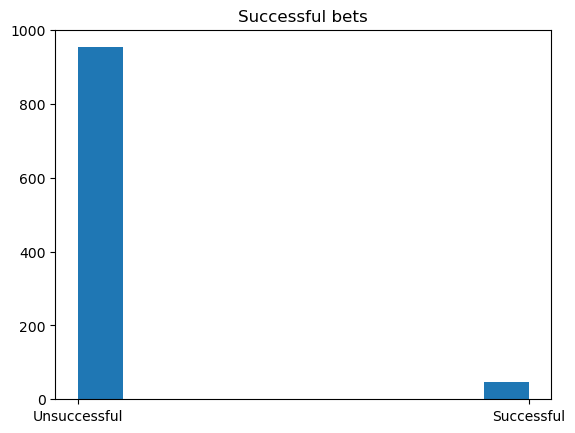

In [14]:
plot_successful_bets(money_histories[500], 500)

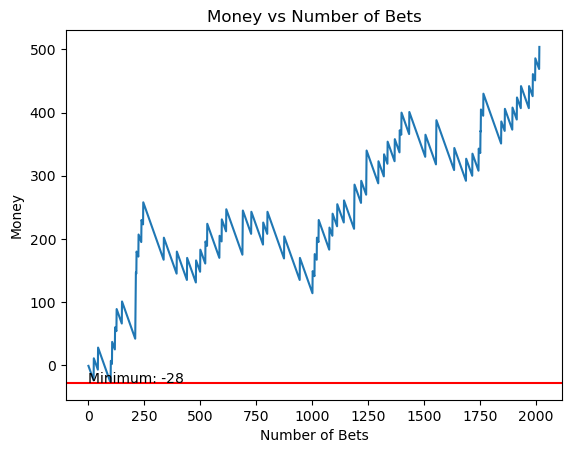

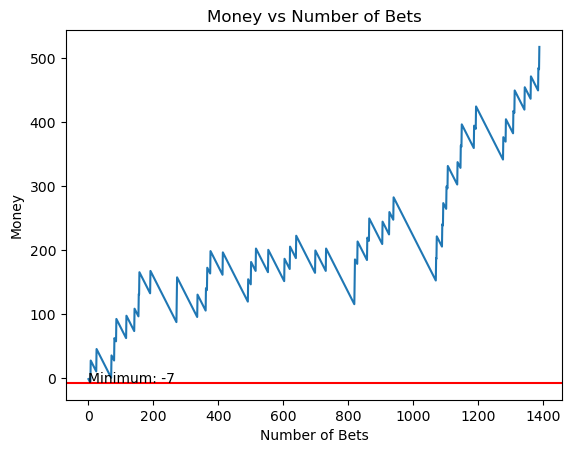

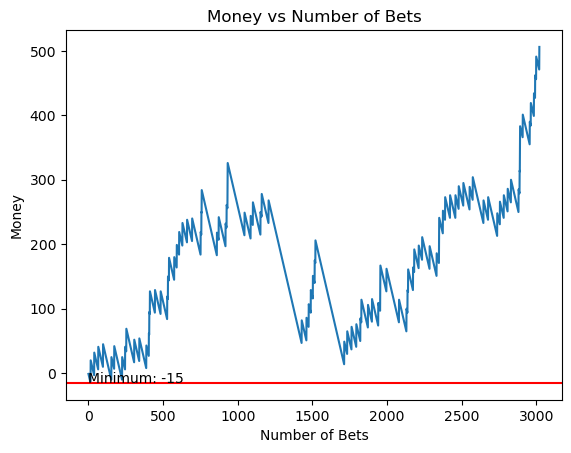

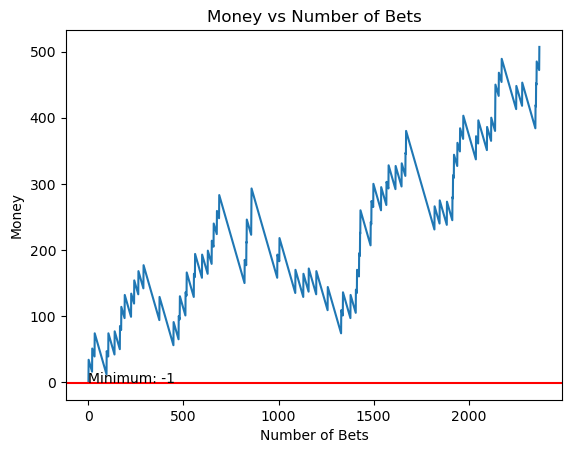

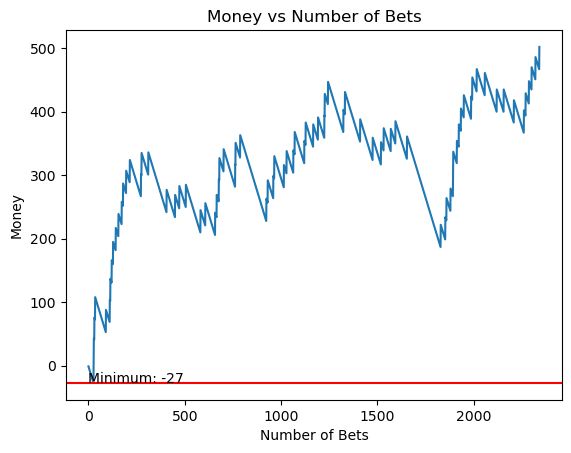

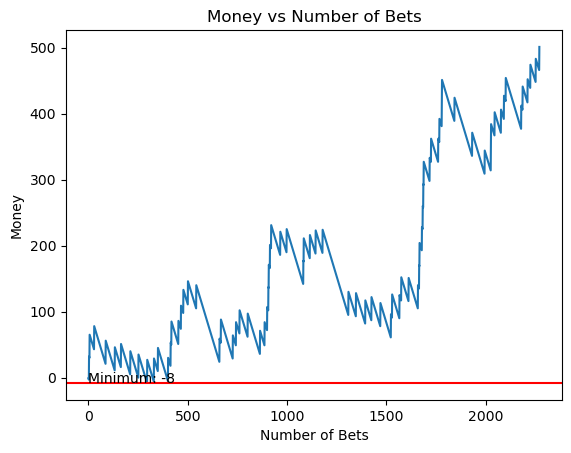

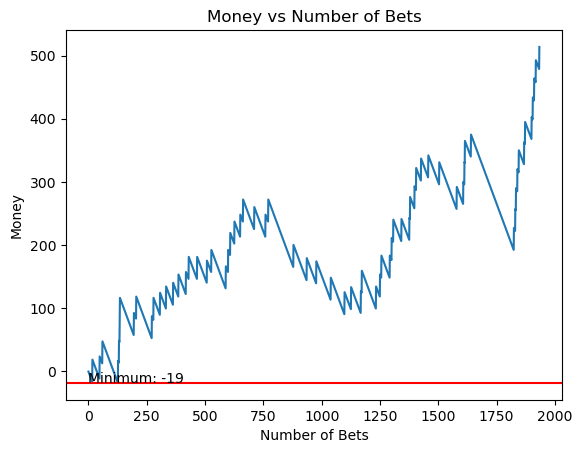

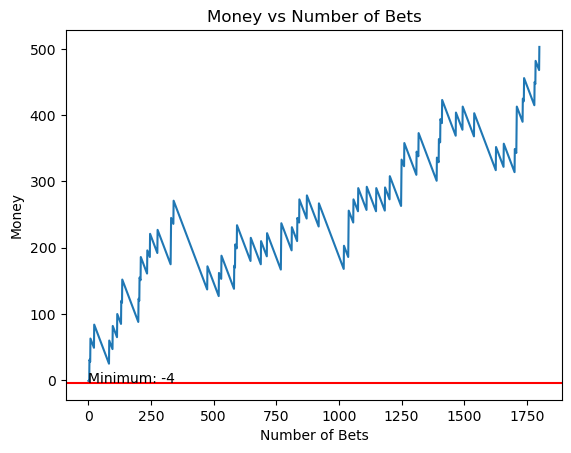

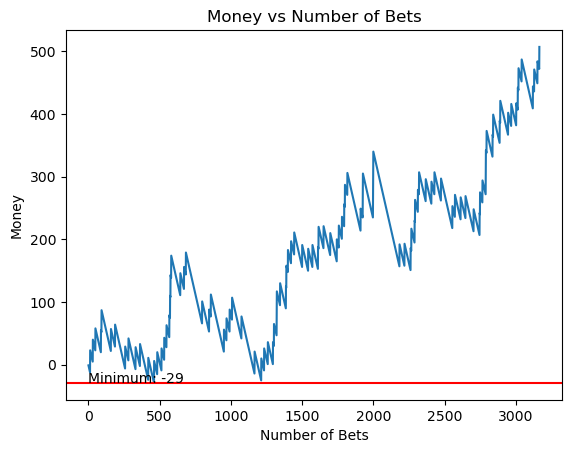

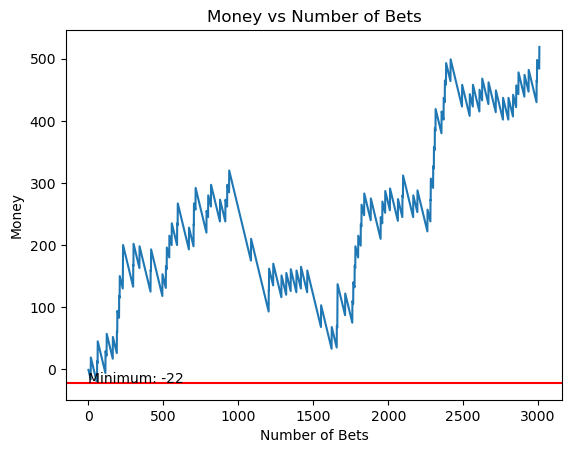

In [15]:
plot_money_histories(successful_histories, 500)

## Analysis when the goal is to win 1000 units

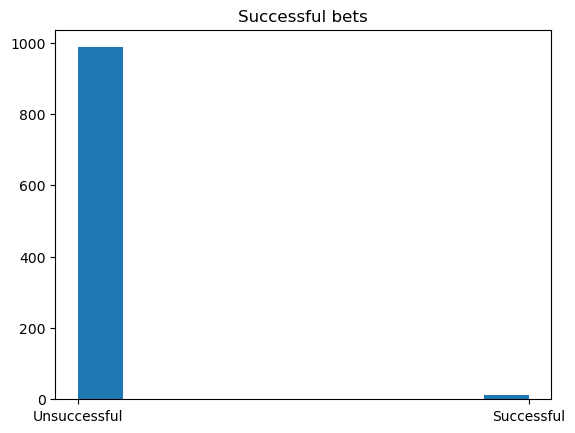

In [16]:
plot_successful_bets(money_histories[1000], 1000)

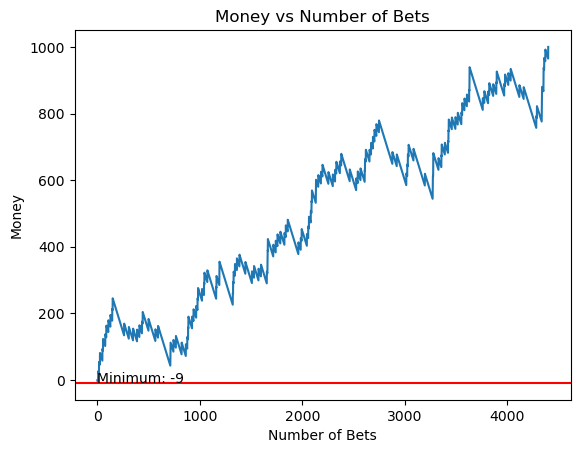

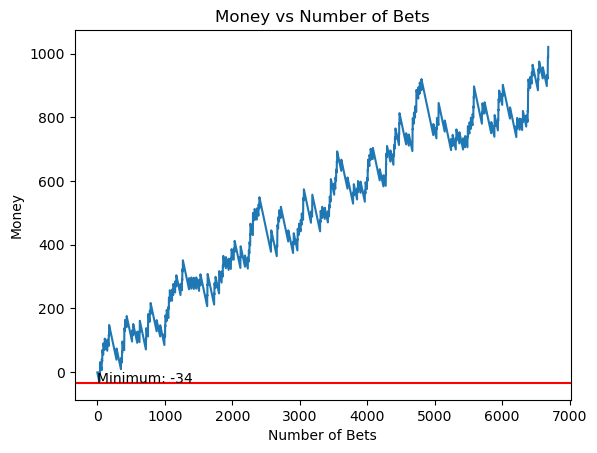

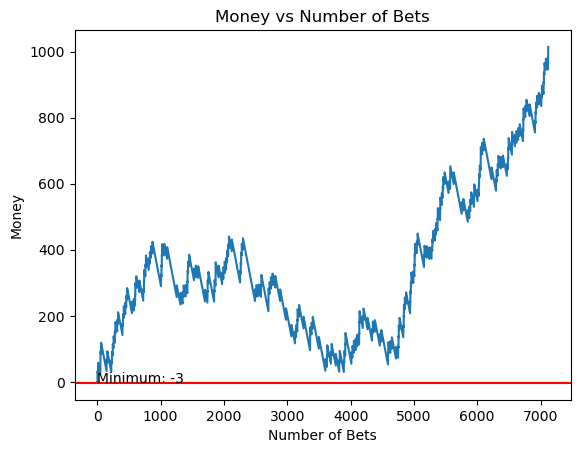

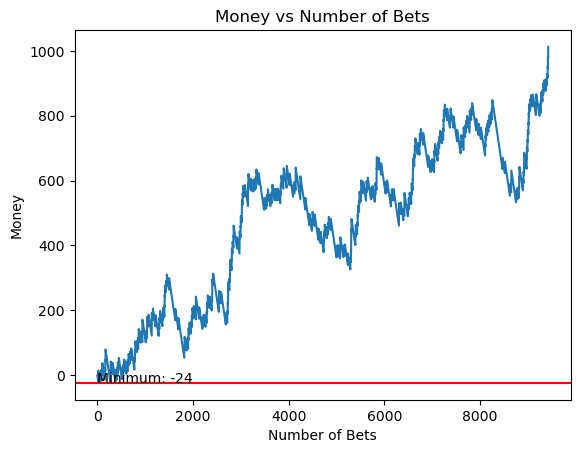

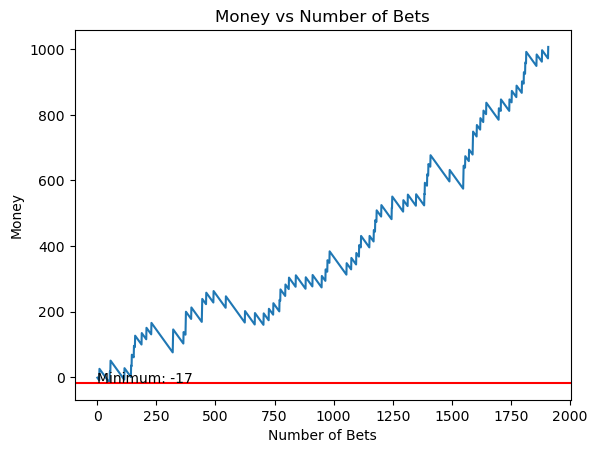

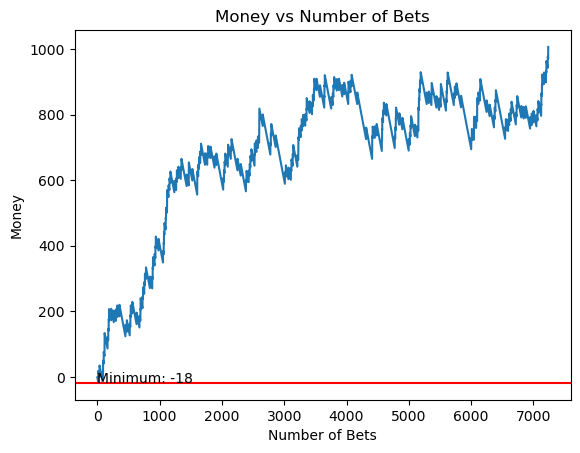

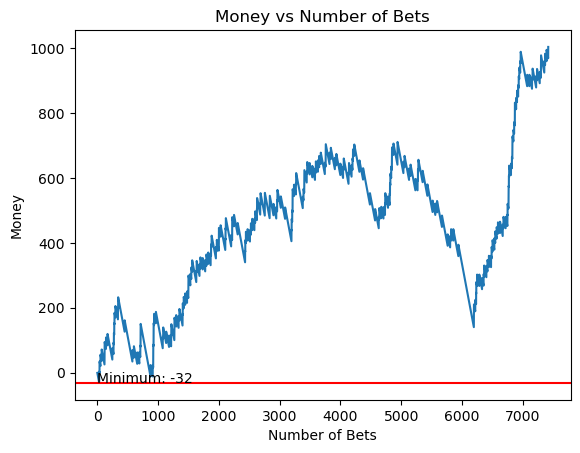

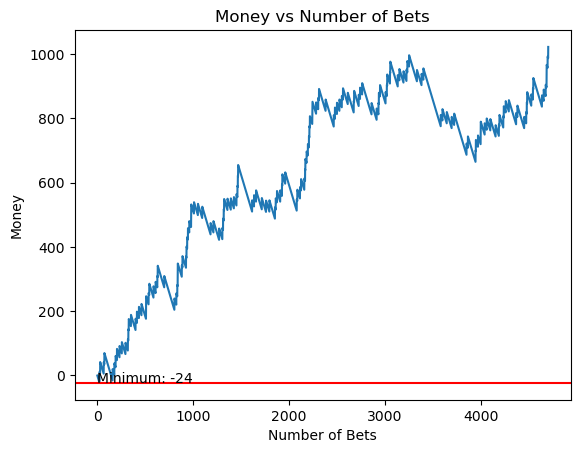

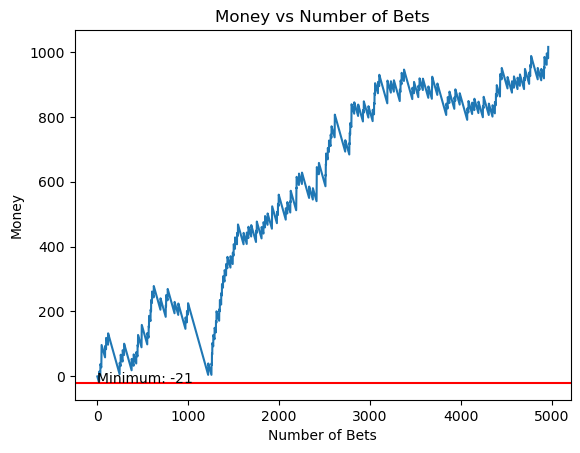

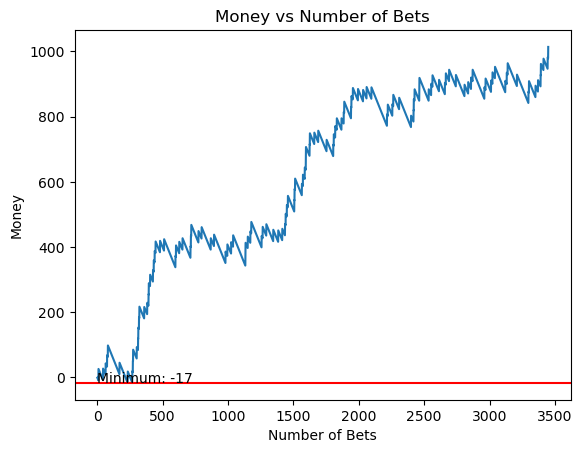

In [17]:
plot_money_histories(successful_histories, 1000)